In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
path_to_dataset = '/content/house-votes-84.data'

data = (np.genfromtxt(path_to_dataset, delimiter=',', dtype=object, unpack=True)).T
tf_data = tf.convert_to_tensor(data)
print(tf_data.device)

/job:localhost/replica:0/task:0/device:GPU:0


In [3]:
Y = tf_data[:, 0]
Y = tf.convert_to_tensor([1 if i == b'democrat' else -1 for i in Y])
print(Y.device)

/job:localhost/replica:0/task:0/device:GPU:0


In [5]:
X = data[:, 1:]
for index, column in enumerate(X): 
    new_column = []
    for i in column:
        encoded_val = 0
        if i == b'y':
            encoded_val = 1
        elif i == b'n':
            encoded_val = -1
        new_column.append(encoded_val)
    X[index] = new_column
X = tf.convert_to_tensor(X.astype('int8'))
print(X.device)

/job:localhost/replica:0/task:0/device:GPU:0


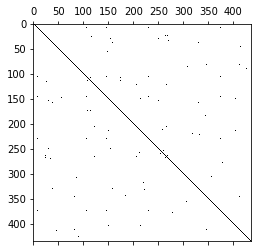

In [6]:
tf.debugging.set_log_device_placement(True)
# compute the weight matrix W for the vertices of our graph 
def eta(tt, rr):

 val = tf.math.exp( - (tt**2)/(2*rr**2) ) 
  
 return val
  
import scipy.spatial 

dist = scipy.spatial.distance_matrix(X, X, p = 2)

r = 0.2

W = eta(dist, r)

plt.spy(W>=0.01)

In [7]:
# compute Laplacian matrices 

d = tf.math.reduce_sum(W, axis=1) # degree vector

D = tf.linalg.diag(d)
Ds = tf.linalg.diag(1/np.sqrt(d))
Di = tf.linalg.diag(1/d)


L = D - W # unnormalized

Ln = tf.linalg.matmul(Ds, tf.linalg.matmul((D - W),Ds)) # normalized


print(Ln.device)

/job:localhost/replica:0/task:0/device:GPU:0


In [ ]:
# compute eigendecompositions 

ll, VV = tf.linalg.eigh(L)

# we need to sort the eigenvalues and vectors 

idx = tf.argsort(ll)
l = ll[idx]
V = VV[:, idx]

lln, VVn = tf.linalg.eigh(Ln)

idxn = lln.argsort()
ln = lln[idxn]
Vn = VVn[:, idxn]

q1 = tf.math.sign(V[:,1])
print(q1)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], c=Y, s= 30, cmap='brg')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X[:,0], X[:,1], color='b')
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('Input (Unlabelled) data')

In [ ]:
# visualize the graph using NetworkX

import networkx as nx

G = nx.Graph()
N = len(X)
for i in range(N):
  for j in range(N):
    if i != j and W[i,j] != 0 :
      G.add_edge(i, j, weight=W[i,j])

fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], color='b')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('Input (Unlabelled) data')


nx.draw_networkx_nodes(G, X, node_size=100, ax = ax[1])
nx.draw_networkx_edges(G, X, ax = ax[1])
ax[1].set_aspect('equal')
ax[1].set_title('Proximity Graph')